In [57]:
%load_ext autoreload
%autoreload 2
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import data_strings
import analysis.player_scores as player_scores
import data_extraction.get_indices as get_indices
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import parse_data.identify_filepaths as identify_filepaths 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Getting proportion of score by each player in each session

In [2]:
data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data\pseudonymised_json_files'
json_filenames_social, json_filenames_first_solo, json_filenames_second_solo = identify_filepaths.get_all_relative_paths(data_folder=data_folder)
json_filenames_both_solos = [session for pair in zip(json_filenames_first_solo, json_filenames_second_solo) for session in pair]


AttributeError: module 'parse_data.identify_filepaths' has no attribute 'get_all_relative_paths'

In [83]:
data_folder = data_strings.DATA_FOLDER
json_filenames_social, json_filenames_solo = identify_filepaths.get_filenames(data_folder=data_folder)
test = identify_filepaths.get_relative_paths('Solo', data_folder=data_folder)

In [84]:
json_filenames = json_filenames_social[-8:]

In [87]:
json_filenames[0]

'250512_2/2025-05-12_12-23-08_NO12_AS12_Social.json'

In [88]:
df, trial_lists = prepare_data.prepare_data(data_folder, json_filenames, combine=False)

IntProgress(value=0, max=8)

filepath: /mnt/tom/ceph/ogma/human_octagon/RAW/standard/250512_2/2025-05-12_12-23-08_NO12_AS12_Social.json
Loading complete.
Preprocessing complete.
filepath: /mnt/tom/ceph/ogma/human_octagon/RAW/standard/250520_1/2025-05-20_14-29-04_CY20_MJ20_Social.json
Loading complete.
Preprocessing complete.
filepath: /mnt/tom/ceph/ogma/human_octagon/RAW/standard/250521_1/2025-05-21_09-31-42_EH21_SP21_Social.json
Loading complete.
Preprocessing complete.
filepath: /mnt/tom/ceph/ogma/human_octagon/RAW/standard/250522_1/2025-05-22_09-26-39_SS22_AD22_Social.json
Loading complete.
Preprocessing complete.
filepath: /mnt/tom/ceph/ogma/human_octagon/RAW/standard/250523_1/2025-05-23_18-05-58_JW23_YL23_Social.json
Loading complete.
Preprocessing complete.
filepath: /mnt/tom/ceph/ogma/human_octagon/RAW/standard/250524_1/2025-05-24_10-28-19_JP24_IP24_Social.json
Loading complete.
Preprocessing complete.
filepath: /mnt/tom/ceph/ogma/human_octagon/RAW/standard/250530_1/2025-05-30_11-33-24_ZZ30_VW30_Social.json

In [89]:
proportion_score_array = player_scores.proportion_score_sessions_df(trial_lists)

In [90]:
np.sum(proportion_score_array * 22 + 9, axis=1)

array([40., 40., 40., 40., 40., 40., 40., 40.])

In [91]:
json_filenames

['250512_2/2025-05-12_12-23-08_NO12_AS12_Social.json',
 '250520_1/2025-05-20_14-29-04_CY20_MJ20_Social.json',
 '250521_1/2025-05-21_09-31-42_EH21_SP21_Social.json',
 '250522_1/2025-05-22_09-26-39_SS22_AD22_Social.json',
 '250523_1/2025-05-23_18-05-58_JW23_YL23_Social.json',
 '250524_1/2025-05-24_10-28-19_JP24_IP24_Social.json',
 '250530_1/2025-05-30_11-33-24_ZZ30_VW30_Social.json',
 '250604_1/2025-06-04_15-23-18_MP04_SH04_Social.json']

In [92]:
proportion_score_array[:]

array([[0.52286282, 0.47713718],
       [0.70121951, 0.29878049],
       [0.51291513, 0.48708487],
       [0.48823529, 0.51176471],
       [0.6496063 , 0.3503937 ],
       [0.4557596 , 0.5442404 ],
       [0.40133779, 0.59866221],
       [0.62627986, 0.37372014]])

In [93]:
payment_array = proportion_score_array * 22 + 9
payment_array

array([[20.50298211, 19.49701789],
       [24.42682927, 15.57317073],
       [20.28413284, 19.71586716],
       [19.74117647, 20.25882353],
       [23.29133858, 16.70866142],
       [19.02671119, 20.97328881],
       [17.82943144, 22.17056856],
       [22.778157  , 17.221843  ]])

In [30]:
proportion_wins_player_0_array = np.zeros(len(trial_lists))
for i in range(len(trial_lists)):
    trial_list = trial_lists[i]
    winners = get_indices.get_trigger_activators(trial_list)
    proportion_wins_player_0 = np.sum(winners == 0)/winners.size
    proportion_wins_player_0_array[i] = proportion_wins_player_0

In [31]:
proportion_wins_array = player_scores.proportion_wins_sessions(trial_lists)

In [38]:
proportion_wins_array

array([[0.5704698 , 0.4295302 ],
       [0.32835821, 0.67164179],
       [0.39097744, 0.60902256],
       [0.55555556, 0.44444444],
       [0.37956204, 0.62043796],
       [0.42758621, 0.57241379],
       [0.69047619, 0.30952381],
       [0.52317881, 0.47682119],
       [0.46      , 0.54      ],
       [0.6328125 , 0.3671875 ],
       [0.46621622, 0.53378378],
       [0.40268456, 0.59731544]])

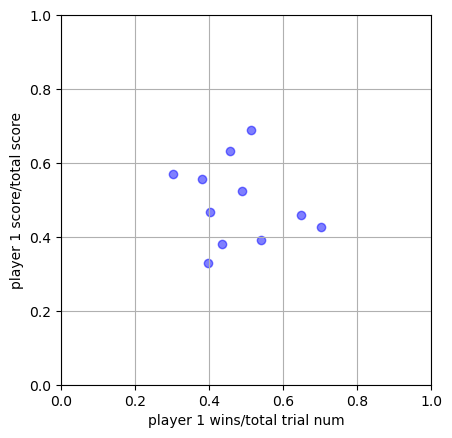

In [37]:
for i in range(len(trial_lists) - 1):
    plt.scatter(proportion_score_array[i,0], proportion_wins_array[i,0], color='blue', alpha=0.5)



plt.gca().set_aspect(1)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('player 1 wins/total trial num')
plt.ylabel('player 1 score/total score')
plt.grid(True)
plt.show()

In [12]:
probability_low_when_first_visible, _, _ = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_social(trial_lists)
ratio_probability_low_when_first_visible = probability_low_when_first_visible[:,0]/probability_low_when_first_visible[:,1]

trial list index: 0
player num: 0
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 2.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 5.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 6.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 5.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 8.0
 this_player_this_tria

In [13]:
probability_low_when_first_visible

array([[0.71428571, 0.76190476],
       [1.        , 0.42857143],
       [0.6       , 0.875     ],
       [0.78947368, 0.65517241],
       [0.85714286, 0.81818182],
       [0.6       , 0.90909091],
       [0.61904762, 0.41666667],
       [0.58823529, 0.69230769],
       [1.        , 0.9       ],
       [0.46428571, 1.        ],
       [1.        , 0.27272727],
       [1.        , 0.46153846],
       [0.58333333, 0.72727273],
       [0.23076923, 1.        ],
       [0.85714286, 0.82758621],
       [0.6       , 0.70588235],
       [0.70588235, 0.33333333],
       [0.77777778, 0.27272727],
       [0.625     , 0.23809524]])

In [14]:
ratio_probability_low_when_first_visible

array([0.9375    , 2.33333333, 0.68571429, 1.20498615, 1.04761905,
       0.66      , 1.48571429, 0.8496732 , 1.11111111, 0.46428571,
       3.66666667, 2.16666667, 0.80208333, 0.23076923, 1.03571429,
       0.85      , 2.11764706, 2.85185185, 2.625     ])

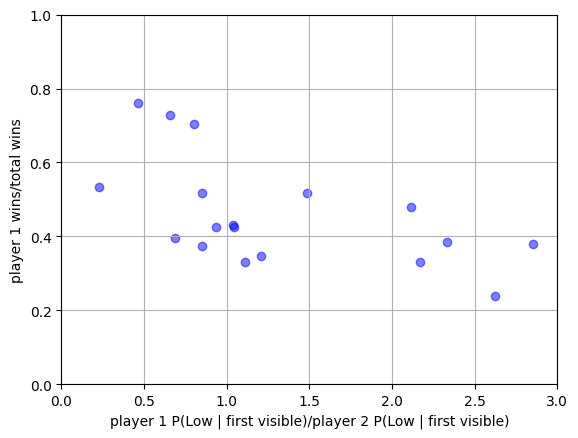

In [15]:
plt.scatter(ratio_probability_low_when_first_visible, proportion_wins_array[:,0], color='blue', alpha=0.5)




plt.ylim(0, 1)
plt.xlim(0, 3)
plt.xlabel('player 1 P(Low | first visible)/player 2 P(Low | first visible)')
plt.ylabel('player 1 wins/total wins')
plt.grid(True)
plt.show()

In [16]:
ratio_probability_low_when_first_visible.size, proportion_score_array.shape[0]

(19, 19)

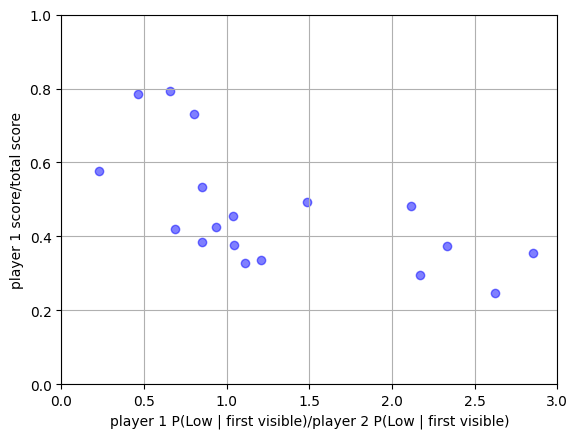

In [17]:
plt.scatter(ratio_probability_low_when_first_visible, proportion_score_array[:,0], color='blue', alpha=0.5)


plt.ylim(0, 1)
plt.xlim(0, 3)
plt.xlabel('player 1 P(Low | first visible)/player 2 P(Low | first visible)')
plt.ylabel('player 1 score/total score')
plt.grid(True)
plt.show()